In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import expit as sigmoid

In [2]:
# Loading data stored in numpy format
Data = np.load("Handwritten_data.npz")
Data.files

['labels', 'data']

In [3]:
y = Data['labels']
m = y.size 
X = Data['data']
# Adding the columns of one for the intercept 
X = np.c_[np.ones(m),X]

num_labels = np.unique(y).size
X.shape,num_labels

((5000, 401), 10)

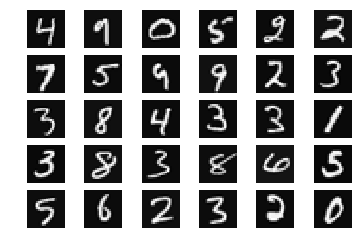

In [120]:
# Plotting 30 random examples from X
indices = np.random.randint(0,m,30)

fig=plt.figure()
for i in range (30):
    img = X[indices[i],1:].reshape(20,20,order='F')
    fig.add_subplot(5,6,i+1)
    plt.imshow(img,cmap='gray')
    plt.axis("off")

In [5]:
# Cost Function and Gradient for Regularized Logistic Regression
# Note : We do not regularize Theta[0] (bias term)
def costFunction(t,X,y,lamb):
    m = np.size(y)
    J =  (-1.0/m)*np.sum((y*np.log(sigmoid(X.dot(t))) + (1-y) * np.log(1-sigmoid(X.dot(t))))) + (
         (lamb/(2.0*m)) * sum(t[1:] **2 ))            # Exclude t[0] (bias term)
    grad = (1.0/m)*((X.T).dot(sigmoid(X.dot(t))-y))
    grad[1:] = grad[1:] + (float(lamb)/m)* t[1:]     # Exclude t[0] (bias term)              
    
    
    return J,grad  

In [6]:
# Computing the Cost and Gradient on sample values
theta_t = np.array([-2,-1,1,2])
X_t = np.hstack((np.ones((5,1)),np.arange(1,16).reshape(5,3,order='F')/10.0))
y_t = np.array([1,0,1,0,1])
lamb_t = 3
J,G = costFunction(theta_t,X_t,y_t,lamb_t)
print "Cost: ", J
print "Gradient: "
print G

Cost:  2.534819396109744
Gradient: 
[ 0.14656137 -0.54855841  0.72472227  1.39800296]


In [174]:
# Optimizing the parameters theta using scipy.optimize 
def find_min(init_theta,X,y,lamb):
    res = minimize(costFunction,init_theta,args=(X,y,lamb),method = 'CG',jac = True
               ,options={'maxiter':200,'disp':True})  
    return res.x

In [175]:
# oneVsAll trains multiple logistic regression classifiers and returns all
# the classifiers in a matrix theta_mat, where the i-th row of theta_mat 
# corresponds to the classifier for label i
def oneVsAll(X,y,num_labels,lamb):
    m,n = X.shape
    theta_mat = np.empty([num_labels,n])
    for i in range(num_labels):
        print "Label: %s" % i 
        y_temp = (y == i).astype(int)
        init_theta = np.zeros(n)
        init_theta = find_min(init_theta,X,y_temp,lamb)
        theta_mat[i,:] = init_theta
    return theta_mat
        

In [176]:
# Training One-vs-All Logistic Regression
lamb = 0.1
theta_mat = oneVsAll(X,y,num_labels,lamb)

Label: 0
Optimization terminated successfully.
         Current function value: 0.008579
         Iterations: 100
         Function evaluations: 387
         Gradient evaluations: 387
Label: 1
Optimization terminated successfully.
         Current function value: 0.013126
         Iterations: 99
         Function evaluations: 376
         Gradient evaluations: 376
Label: 2
         Current function value: 0.050835
         Iterations: 200
         Function evaluations: 618
         Gradient evaluations: 618
Label: 3
         Current function value: 0.057615
         Iterations: 200
         Function evaluations: 591
         Gradient evaluations: 591
Label: 4
Optimization terminated successfully.
         Current function value: 0.033078
         Iterations: 172
         Function evaluations: 571
         Gradient evaluations: 571
Label: 5
         Current function value: 0.054503
         Iterations: 200
         Function evaluations: 600
         Gradient evaluations: 600
Label: 6
Op

In [177]:
# Predicting labels 
def predictOneVsAll(X,theta_mat):
    
    temp = sigmoid(X.dot(theta_mat.T))
    label = np.argmax(temp,axis = 1)
    return label

In [178]:
# Predicting Accuracy on the training set
y_predict = predictOneVsAll(X,theta_mat)
accuracy = np.mean(y == y_predict) *100
print "Accuracy on the Training Set %s %%" % round(accuracy,2)
print "Logistic Regression made errors in predicting %s samples out of 5000 in the training set " % np.count_nonzero(y != y_predict)

Accuracy on the Training Set 96.44 %
Logistic Regression made errors in predicting 178 samples out of 5000 in the training set 


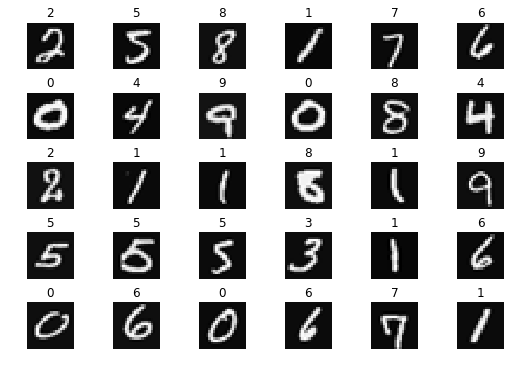

In [179]:
# Plotting 30 random examples from X with their predicted labels
indices = np.random.randint(0,m,30)

fig = plt.figure(figsize = (9,6))

for i in range (30):
    img = X[indices[i],1:].reshape(20,20,order='F')
    fig.add_subplot(5,6,i+1)    
    plt.title(y_predict[indices[i]])
    plt.imshow(img,cmap='gray')
    plt.axis("off")

plt.subplots_adjust(hspace = 0.5)    